# User Segmentation Based on Search Behavior

######  - Zumarsiyah Mahsyari -

User segmentation can be created by clustering. Many algorithms can be used. This time we will create user segmentation based on search behavior. We will use K-Modes because many variables are categorical data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load & Read Data

In [71]:
df = pd.read_excel("C:/Users/Zumar/Documents/99.co/99.co Data Analyst Challenge.xlsx")
df.head()

,search_time,search_id,listing_type,property_type,search_location,search_price_min,search_price_max,platform,user_id
0,2018-07-01 00:28:18.404,1,rent,condo,"dtdistrict15,dtdistrict16,dtdistrict18",2000.0,4000.0,web,u1386
1,2018-07-01 00:28:19.036,2,rent,condo,"dtdistrict15,dtdistrict16,dtdistrict18",2000.0,4000.0,web,u1386
2,2018-07-01 00:31:56.197,3,rent,condo,"dtdistrict15,dtdistrict16,dtdistrict18",2000.0,4000.0,web,u1386
3,2018-07-01 00:31:56.975,4,rent,condo,"dtdistrict15,dtdistrict16,dtdistrict18",2000.0,4000.0,web,u1386
4,2018-07-01 00:34:36.940,5,rent,condo,"dtdistrict15,dtdistrict16,dtdistrict18",2000.0,4000.0,web,u1386


In [72]:
#Dimension
df.shape

(25332, 9)

In [73]:
#Unique value for user_id
df['user_id'].nunique()

2287

The dataset consists of 25332 rows and 9 columns. After we observe, it turns out there are only 2287 user_id. This indicates that there is duplicate data in the dataset.

In [74]:
#Information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25332 entries, 0 to 25331
Data columns (total 9 columns):
search_time         25332 non-null datetime64[ns]
search_id           25332 non-null int64
listing_type        25332 non-null object
property_type       17248 non-null object
search_location     25332 non-null object
search_price_min    13426 non-null float64
search_price_max    23784 non-null float64
platform            25332 non-null object
user_id             25332 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 1.7+ MB


The information above shows that the data types are each feature. It also shows that there are missing values on some features.

### Data Wrangling

In [75]:
#Drop duplicate data
df.drop_duplicates(subset =["user_id", 'search_price_max', 'search_price_min', 'search_location', 'property_type','listing_type'], 
                     keep = 'first', inplace = True)
df.shape

(6429, 9)

Duplicate data will affect the results of the analysis that we do, so we need to delete the duplicate data. Now, we have a dataset with 6429 rows and 9 columns. Unfortunately, because some data was erased, the index data also turned out in order. We need to reset the index.

In [76]:
df.head()

,search_time,search_id,listing_type,property_type,search_location,search_price_min,search_price_max,platform,user_id
0,2018-07-01 00:28:18.404,1,rent,condo,"dtdistrict15,dtdistrict16,dtdistrict18",2000.0,4000.0,web,u1386
5,2018-07-01 00:47:45.753,6,sale,NaN,"dtdistrict09,dtdistrict11,dtdistrict10",NaN,3700000.0,web,u328
8,2018-07-01 01:18:47.550,9,room,NaN,dtdistrict12,NaN,1000.0,web,u1604
9,2018-07-01 01:18:48.453,10,room,hdb,dtdistrict12,NaN,1000.0,web,u1604
10,2018-07-01 01:26:50.805,11,rent,condo,dtdistrict05,2000.0,NaN,web,u1696


In [77]:
#reset index
df.reset_index(inplace=True)
df.head()

,index,search_time,search_id,listing_type,property_type,search_location,search_price_min,search_price_max,platform,user_id
0,0,2018-07-01 00:28:18.404,1,rent,condo,"dtdistrict15,dtdistrict16,dtdistrict18",2000.0,4000.0,web,u1386
1,5,2018-07-01 00:47:45.753,6,sale,NaN,"dtdistrict09,dtdistrict11,dtdistrict10",NaN,3700000.0,web,u328
2,8,2018-07-01 01:18:47.550,9,room,NaN,dtdistrict12,NaN,1000.0,web,u1604
3,9,2018-07-01 01:18:48.453,10,room,hdb,dtdistrict12,NaN,1000.0,web,u1604
4,10,2018-07-01 01:26:50.805,11,rent,condo,dtdistrict05,2000.0,NaN,web,u1696


In [78]:
df['user_id'].nunique()

2287

After the duplicate data is erased, we check the number of user_id again. The result is the same as before, so we can be sure that our dataset is safe for subsequent analysis.

Furthermore, to do clustering, we only need a few features. So, let's delete some features that are not needed.

In [79]:
#drop some features
df.drop(df[['index','search_time', 'search_id', 'platform', 'user_id']],axis = 1,inplace = True)
df.head()

,listing_type,property_type,search_location,search_price_min,search_price_max
0,rent,condo,"dtdistrict15,dtdistrict16,dtdistrict18",2000.0,4000.0
1,sale,NaN,"dtdistrict09,dtdistrict11,dtdistrict10",NaN,3700000.0
2,room,NaN,dtdistrict12,NaN,1000.0
3,room,hdb,dtdistrict12,NaN,1000.0
4,rent,condo,dtdistrict05,2000.0,NaN


Now we have a new dataset with 5 features; listing type, propertytype, search_location, search_price_min, and search_price_max.

Let's identify the missing value of each feature.

In [80]:
#identifying missing value
mv = df.isnull().sum()
mv = pd.DataFrame(mv, columns = ['missing value'])
mv['Percentage'] = mv['missing value'] / 6429 *100
mv

,missing value,Percentage
listing_type,0,0.000000
property_type,2565,39.897340
search_location,0,0.000000
search_price_min,2812,43.739306
search_price_max,873,13.579095


Based on the table above, there are missing values ​​in property_type, searc_price_min, and search_price_max. We need to handle it by filling it in with the appropriate value. Let's position ourselves when we become user who are searching.

1. Possible user does not choose any category in the search for property type because he wants to find a residence of all property types. Without it choosing any type, the website will still display all types of properties that may be searched by the user. Therefore, the missing value is filled with 'condo, hdb, landed' which means that all categories are selected.
2. Possible user does not choose to enter the minimum value of the price because he wants to find a place to stay starting from the lowest price. So, let's fill in the minimum price, which is 0.
3. Possible user does not choose to enter the maximum value of the price because he wants to find a place to stay until the highest price. Because it is difficult to determine the maximum price of this case, then let's fill with the maximum price.

In [81]:
df['property_type'] = df['property_type'].fillna('condo,hdb,landed')
df['search_price_min'] = df['search_price_min'].fillna(df['search_price_min'].min())
df['search_price_max'] = df['search_price_max'].fillna(df['search_price_max'].max())
df.head()

,listing_type,property_type,search_location,search_price_min,search_price_max
0,rent,condo,"dtdistrict15,dtdistrict16,dtdistrict18",2000.0,4000.0
1,sale,"condo,hdb,landed","dtdistrict09,dtdistrict11,dtdistrict10",0.0,3700000.0
2,room,"condo,hdb,landed",dtdistrict12,0.0,1000.0
3,room,hdb,dtdistrict12,0.0,1000.0
4,rent,condo,dtdistrict05,2000.0,20000000.0


In [82]:
#identifying missing value
mv = df.isnull().sum()
mv = pd.DataFrame(mv, columns = ['missing value'])
mv['Percentage'] = mv['missing value'] / 6429 *100
mv

,missing value,Percentage
listing_type,0,0.0
property_type,0,0.0
search_location,0,0.0
search_price_min,0,0.0
search_price_max,0,0.0


After all missing values are filled, the analysis can proceed.

In [83]:
#unique value of property_type
df['property_type'].unique()

array(['condo', 'condo,hdb,landed', 'hdb', 'condo,hdb', 'landed',
       'condo,landed', 'hdb,landed', 'condo,landed,hdb', 'all'],
      dtype=object)

In property type, we find the category 'all' which means that the user chooses all property types (condo, hdb, and landed). Let's change the 'all' category to 'condo, hdb, landed' to facilitate analysis.

In [84]:
#replace 'all' category to 'condo,hdb,landed'
df = df.replace(['all'], 'condo,hdb,landed')
df['property_type'].unique()

array(['condo', 'condo,hdb,landed', 'hdb', 'condo,hdb', 'landed',
       'condo,landed', 'hdb,landed', 'condo,landed,hdb'], dtype=object)

We will have difficulty processing the property_type and search_location features so we need to change them to dummy.

In [85]:
#dummy features
df = df.drop('property_type', 1).join(df.property_type.str.get_dummies(','))
df = df.drop('search_location', 1).join(df.search_location.str.get_dummies(','))
df.reset_index()
df.head()

,listing_type,search_price_min,search_price_max,condo,hdb,landed,dtdistrict01,dtdistrict02,dtdistrict03,dtdistrict04,...,dtdistrict19,dtdistrict20,dtdistrict21,dtdistrict22,dtdistrict23,dtdistrict24,dtdistrict25,dtdistrict26,dtdistrict27,dtdistrict28
0,rent,2000.0,4000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,sale,0.0,3700000.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,room,0.0,1000.0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,room,0.0,1000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,rent,2000.0,20000000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
df.shape

(6429, 34)

Now we have a dataset with 6429 rows and 34 columns.

Data is ready to be analyzed. Let's do exploratory data analysis.

### Exploration Data Analysis

##### 1. Listing_type

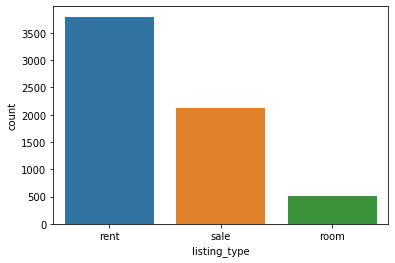

In [87]:
ax = sns.countplot(x=df['listing_type'], data=df)

Based on the graph above, most users look for a place to live for the purpose of renting it.

##### 2. Search_price_min and search_price_max

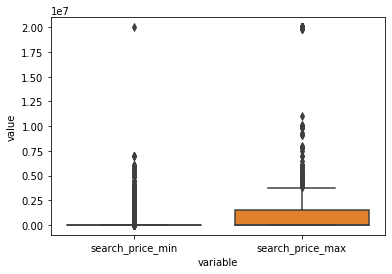

In [90]:
prices = df[['search_price_min', 'search_price_max']]
dff2=pd.melt(prices)
sns.boxplot(y="value", x="variable", data=dff2)

Based on the graph above, users tend to look for a place to live with the minimum possible price. They also limit the maximum price of the residence they are looking for to a price that is not too far from the minimum price.

##### 3. Property_type

Text(0.5, 1.0, 'property_type')

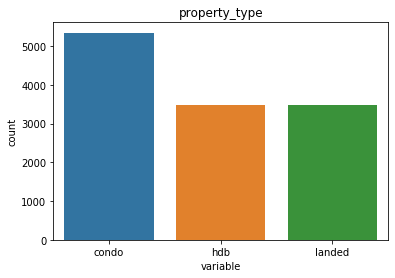

In [97]:
property_type = pd.melt(df.iloc[:,3:6])
sns.countplot(data=property_type.loc[property_type['value']==1], x='variable')
plt.title('property_type')

Based on the graph above, most users look for a place with a 'condo' type for them to live in.

##### 4. Search_location

Text(0.5, 1.0, 'District')

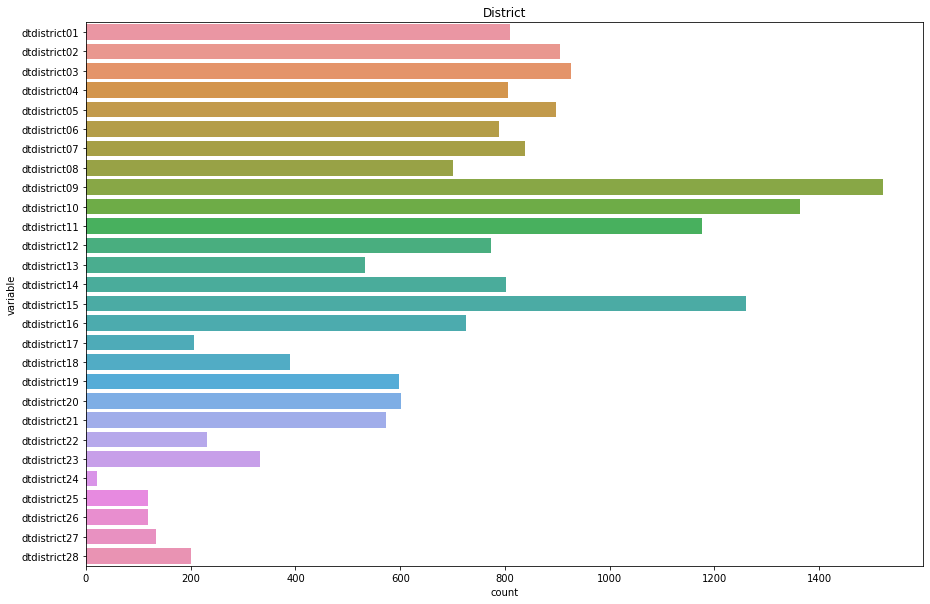

In [100]:
district = pd.melt(df.iloc[:,6:])
f, axs = plt.subplots(1,1,figsize = (15,10))
sns.countplot(data=district.loc[district['value']==1], y='variable')
plt.title('District')

Based on the graph above, dtdistrict09 is the location that is most in demand by users. Overall, users tend to look for a place to stay in dtdistrict 01 to dtdistrict 15.

### Clustering

The method we will use for clustering is k-modes because there are many features in the form of category data. Actually k-modes can be used for categorical and numeric data, but the mode cannot be that specific in processing numerical data so we use another path. We will cluster numerical data, i.e. search_price_min and search_price_max. After that we will get new features in the form of category data which we will use for clasters with other category data using k-modes.

##### K-Means

Let's find the best number of clusters. We use the Elbow and Silhouette Coefficient methods.

In [18]:
#Clustering use k-means for price
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

km_scores= []
km_silhouette = []
for i in range(2,7):
    km = KMeans(n_clusters=i, random_state=0).fit(prices)
    preds_kmeans = km.predict(prices)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(prices)))
    km_scores.append(-km.score(prices))
    
    silhouette = silhouette_score(prices,preds_kmeans)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

Score for number of cluster(s) 2: -9834474812753466.0
Silhouette score for number of cluster(s) 2: 0.9484331330666151
Score for number of cluster(s) 3: -4763510021564405.0
Silhouette score for number of cluster(s) 3: 0.8063294980879782
Score for number of cluster(s) 4: -3174644492602199.5
Silhouette score for number of cluster(s) 4: 0.8035796921175451
Score for number of cluster(s) 5: -2452526727409906.0
Silhouette score for number of cluster(s) 5: 0.7952660048457002
Score for number of cluster(s) 6: -1811224839908421.0
Silhouette score for number of cluster(s) 6: 0.7961558761901856


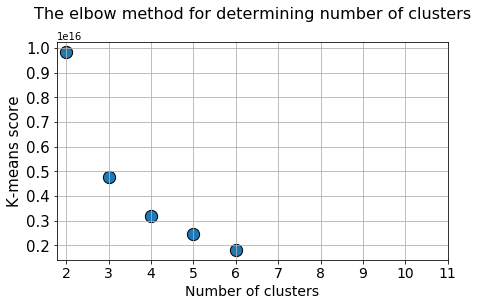

In [19]:
#Elbow method visualization
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,7)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

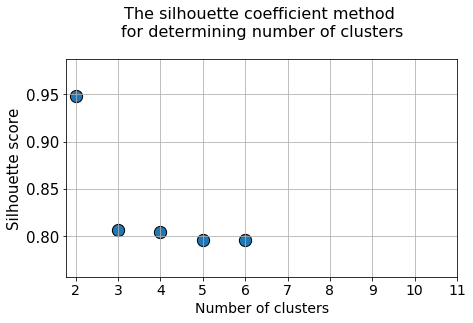

In [20]:
#Silhouette coefficient method visualization
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,7)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

Based on the Elbow method, the best number of clusters is 3, while based on the silhouette coefficient method, the best number of clusters is 2. But we will choose 3 clusters to be more specific in describing user search behavior.

In [21]:
#k-means with k = 3
k_means = KMeans(init = 'k-means++', n_clusters = 3)
k_means.fit(prices)
k_means.labels_

array([0, 2, 0, ..., 0, 0, 0])

We have got the cluster label and let's replace the 'search_price_min' and 'search_price_max' features with the new feature of the cluster label.

In [22]:
#Convert the label cluster to DataFrame
df['Prices_group'] = pd.DataFrame(k_means.labels_)
df.shape

(6429, 35)

In [23]:
#Drop data that we don't need
df.drop(df[['search_price_min', 'search_price_max']],axis = 1,inplace = True)
df.head()

,listing_type,condo,hdb,landed,dtdistrict01,dtdistrict02,dtdistrict03,dtdistrict04,dtdistrict05,dtdistrict06,...,dtdistrict20,dtdistrict21,dtdistrict22,dtdistrict23,dtdistrict24,dtdistrict25,dtdistrict26,dtdistrict27,dtdistrict28,Prices_group
0,rent,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,sale,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,room,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,room,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,rent,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


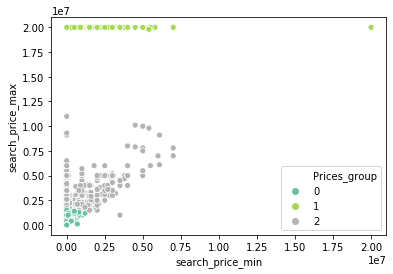

In [24]:
#Cluster visualizzation
sns.scatterplot(x=prices.search_price_min, y=prices.search_price_max, hue=df['Prices_group'], 
                palette="Set2")

The 3 clusters formed are:
1. Cluster 0 with search_price_min and search_price_max no more than 2,500,000
2. Cluster 1 with a maximum value of 20,000,000
3. Cluster 2 with search_price_min no more than 7,500,000 and search_price_max no more than 12,500,000

The amount of data in each cluster is presented in the graph below.

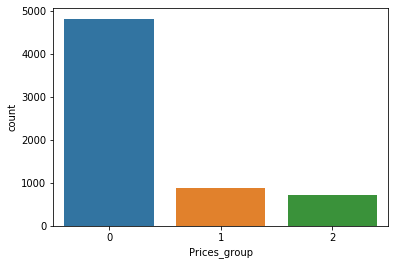

In [25]:
ax = sns.countplot(x=df['Prices_group'], data=df)

##### K-Modes

In [26]:
#copy data
df_copy = df.copy()

In [27]:
#label encoder
from sklearn.preprocessing import LabelEncoder
df['listing_type'] = LabelEncoder().fit_transform(df['listing_type']) 
df.head()

,listing_type,condo,hdb,landed,dtdistrict01,dtdistrict02,dtdistrict03,dtdistrict04,dtdistrict05,dtdistrict06,...,dtdistrict20,dtdistrict21,dtdistrict22,dtdistrict23,dtdistrict24,dtdistrict25,dtdistrict26,dtdistrict27,dtdistrict28,Prices_group
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


We will try to use the Cao and Huang methods for init. Let's find the best number of clusters.

In [28]:
#Clustering use K-Modes
from kmodes.kmodes import KModes

cost = []
for num_clusters in list(range(2,7)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 217, cost: 26032.0
Run 1, iteration: 2/100, moves: 119, cost: 25911.0
Run 1, iteration: 3/100, moves: 21, cost: 25911.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 347, cost: 25297.0
Run 1, iteration: 2/100, moves: 107, cost: 25297.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 591, cost: 24050.0
Run 1, iteration: 2/100, moves: 230, cost: 24050.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 571, cost: 23445.0
Run 1, iteration: 2/100, moves: 388, cost: 23346.0
Run 1, iteration: 3/100, moves: 8, cost: 23346.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 568, cost: 23491.0
Run 1, iteration: 2/100, moves: 329, cost:

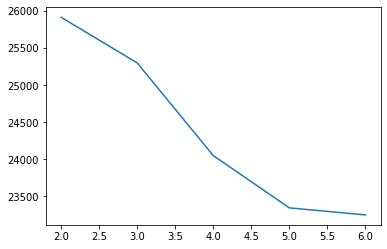

In [29]:
y = np.array([i for i in range(2,7,1)])
plt.plot(y,cost)

In [30]:
cost = []
for num_clusters in list(range(2,7)):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 1, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 394, cost: 25950.0
Run 1, iteration: 2/100, moves: 142, cost: 25950.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 966, cost: 24518.0
Run 1, iteration: 2/100, moves: 0, cost: 24518.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 947, cost: 22752.0
Run 1, iteration: 2/100, moves: 267, cost: 21652.0
Run 1, iteration: 3/100, moves: 334, cost: 21218.0
Run 1, iteration: 4/100, moves: 35, cost: 21218.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2428, cost: 21304.0
Run 1, iteration: 2/100, moves: 672, cost: 21304.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1739, cost: 21723.0
Run 1, iteration: 2/100, moves: 243, cos

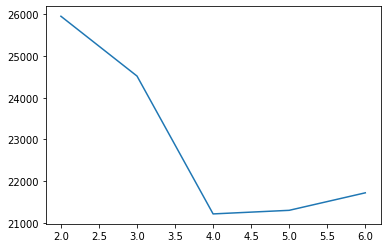

In [31]:
y = np.array([i for i in range(2,7,1)])
plt.plot(y,cost)

When using K-Modes, a better cluster is a cluster with a smaller cost value so we choose to use the Huang method for init with cluster number 5.

In [32]:
kmode = KModes(n_clusters=5, init = "Huang", n_init = 1, verbose=1)
cluster = kmode.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2253, cost: 20915.0
Run 1, iteration: 2/100, moves: 829, cost: 20268.0
Run 1, iteration: 3/100, moves: 323, cost: 20192.0
Run 1, iteration: 4/100, moves: 74, cost: 20192.0


In [33]:
cluster

array([3, 1, 0, ..., 2, 3, 0], dtype=uint16)

The cluster results have been obtained and then we refer to as Segment 0, Segment 1, Segment 2, Segment 3, and Segment 4. Let's convert the results to the dataset we have.

In [34]:
#convert the label cluster to DataFrame
clustersDf = pd.DataFrame(cluster)
clustersDf.columns = ['segment']
combinedDf = pd.concat([df, clustersDf], axis = 1).reset_index()
segmentation = pd.concat([df_copy, clustersDf], axis = 1).reset_index()
segmentation = segmentation.drop(['index'], axis = 1)
segmentation.head()

,listing_type,condo,hdb,landed,dtdistrict01,dtdistrict02,dtdistrict03,dtdistrict04,dtdistrict05,dtdistrict06,...,dtdistrict21,dtdistrict22,dtdistrict23,dtdistrict24,dtdistrict25,dtdistrict26,dtdistrict27,dtdistrict28,Prices_group,segment
0,rent,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,sale,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
2,room,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,room,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,rent,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,3


Because we use many features for clustering, for visualizing the results we use PCA.

In [36]:
#K-modes visualization using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2', 'PC 3'])

In [37]:
finalDf = pd.concat([principalDf, segmentation[['segment']]], axis = 1)
finalDf.head()

,PC 1,PC 2,PC 3,segment
0,-0.737495,-0.579846,0.781747,3
1,1.806777,0.409844,-1.406595,1
2,-0.010767,-0.379589,-0.225953,0
3,0.101258,-0.416168,0.464036,0
4,-0.328695,-0.352138,0.090730,3


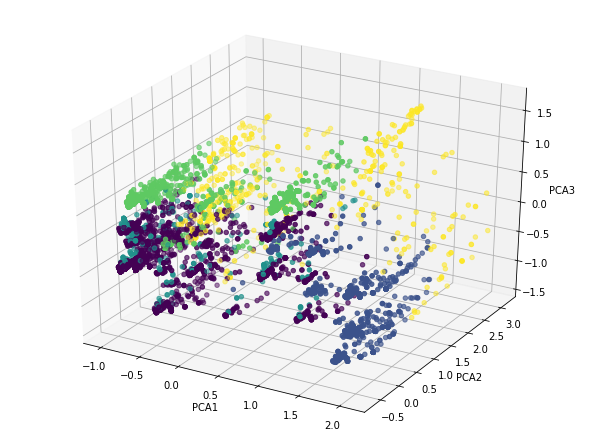

In [38]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize = (8,6))
plt.clf()
ax = Axes3D(fig)

plt.cla()
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

ax.scatter(finalDf['PC 1'], finalDf['PC 2'], finalDf['PC 3'], c = cluster)

We can see 5 different colors in the chart above that represent each segment. We can see 5 different colors in the chart above that represent each segment. For more details, let's look at the characteristics of each segment for each feature.

The amount of data in each cluster is presented in the graph below.

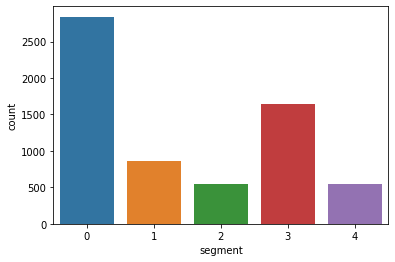

In [39]:
ax = sns.countplot(x=segmentation['segment'], data=segmentation)

Let's parse the character of each segment based on features.

##### 1. Listing_type

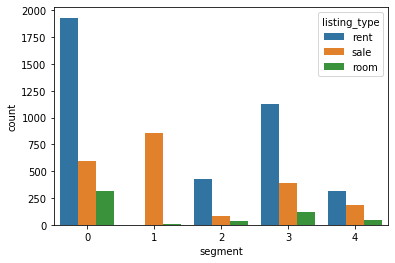

In [103]:
sns.countplot(x=segmentation['segment'],
              hue=segmentation['listing_type'])
plt.show()

The most searched listing_type is 'rent' in each segment, except for segment 1. In segment 1, no one is looking for 'rent' listing_type, but users in this segment tend to look for 'sale' listing_type.

##### 2. Prices_group

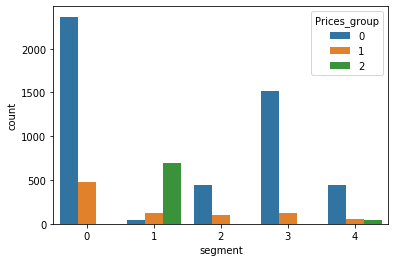

In [104]:
sns.countplot(x=segmentation['segment'],
              hue=segmentation['Prices_group'])
plt.show()

The most searched Price_group is category 0 in each segment, except for segment 1. Category 0 is cluster with search_price_min and search_price_max no more than 2,500,000.
Segment 1 tends to look for price_group with category 2, namely cluster with search_price_min no more than 7,500,000 and search_price_max no more than 12,500,000.

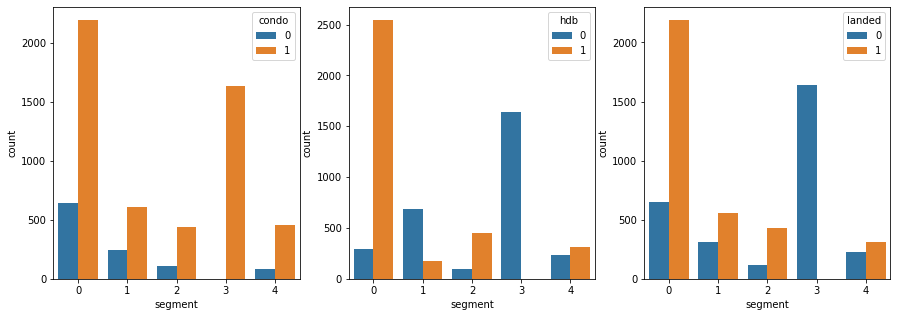

In [108]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=segmentation['segment'],hue=segmentation['condo'],ax=axs[0])
sns.countplot(x=segmentation['segment'],hue=segmentation['hdb'],ax=axs[1])
sns.countplot(x=segmentation['segment'],hue=segmentation['landed'],ax=axs[2])

The diagram above is a user segmentation based on the search for property types (condo, hdb, and landed).
1. User segments 0, 2, and 4 tend to search for all types of properties.
2. User segment 1 tends to look for condo and landed property types.
3. User segment 3 only looks for condo property types.

##### 3. Search_location

Text(0.5, 1.0, 'Segment 0')

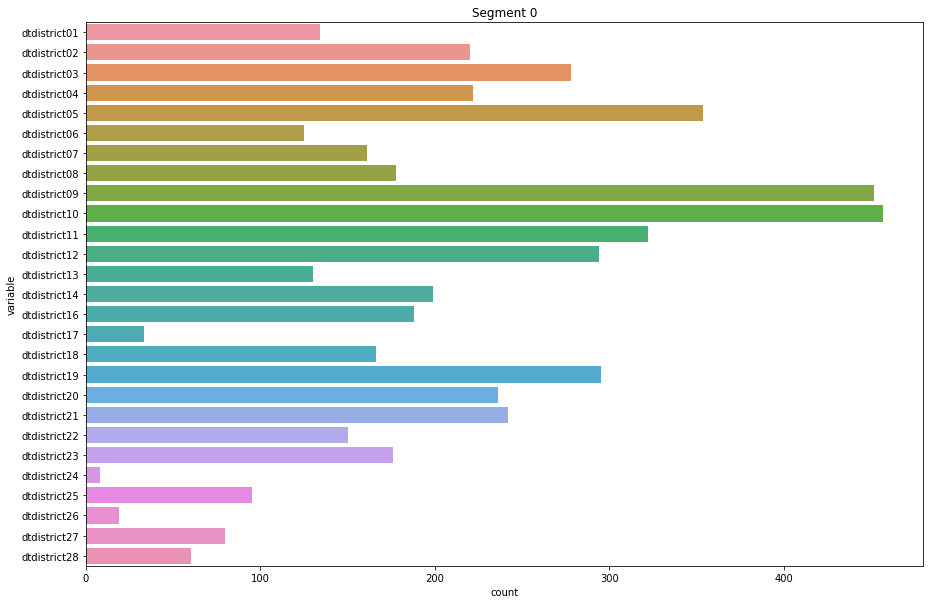

In [111]:
segment0 = segmentation.loc[segmentation['segment']==0]
dis1 = pd.melt(segment0.iloc[:,4:32])
f, axs = plt.subplots(1,1,figsize = (15,10))
sns.countplot(data=dis1.loc[dis1['value']==1], y='variable')
plt.title('Segment 0')

The most searched locations by segment 0 are dtdistrict9 and dtdistrict10.

Text(0.5, 1.0, 'Segment 1')

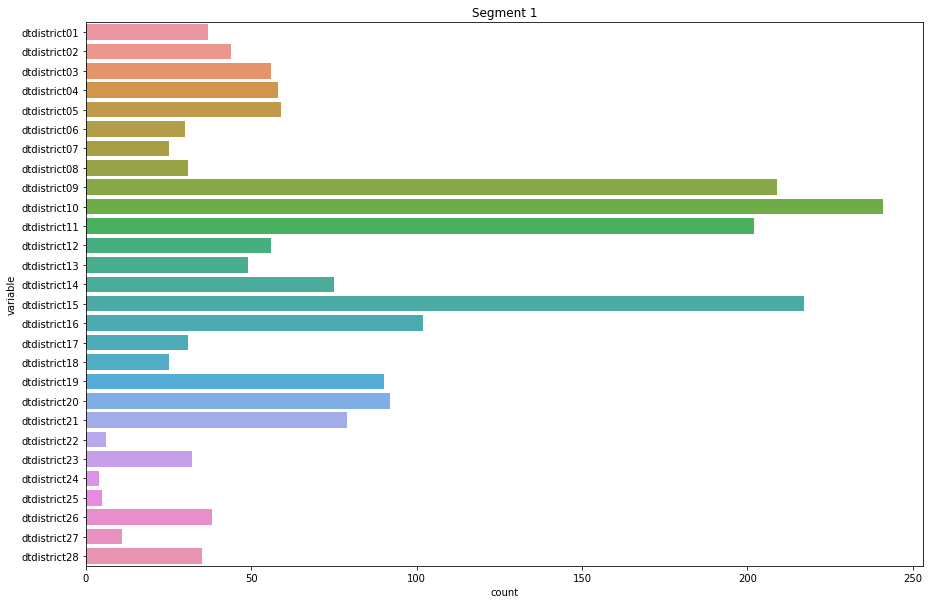

In [112]:
segment1 = segmentation.loc[segmentation['segment']==1]
dis2 = pd.melt(segment1.iloc[:,4:32])
f, axs = plt.subplots(1,1,figsize = (15,10))
sns.countplot(data=dis2.loc[dis2['value']==1], y='variable')
plt.title('Segment 1')

The most searched locations by segment 1 are dtdistrict9, dtdistrict10, dtdistrict11 and dtdistrict15.

Text(0.5, 1.0, 'Segment 2')

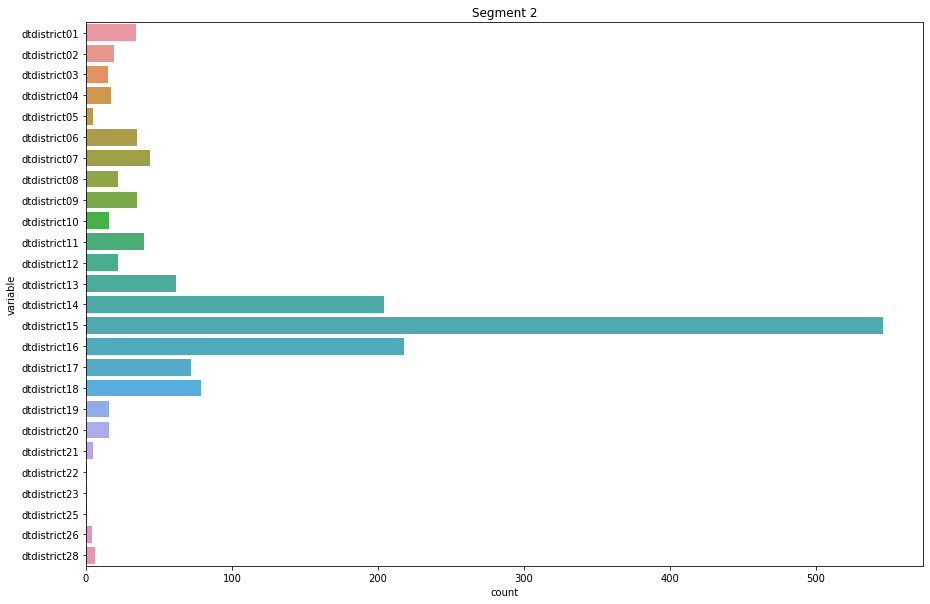

In [113]:
segment2 = segmentation.loc[segmentation['segment']==2]
dis3 = pd.melt(segment2.iloc[:,4:32])
f, axs = plt.subplots(1,1,figsize = (15,10))
sns.countplot(data=dis3.loc[dis3['value']==1], y='variable')
plt.title('Segment 2')

The most search location by segment 2 is dtdistrict15 and only a few search in other locations.

Text(0.5, 1.0, 'Segment 3')

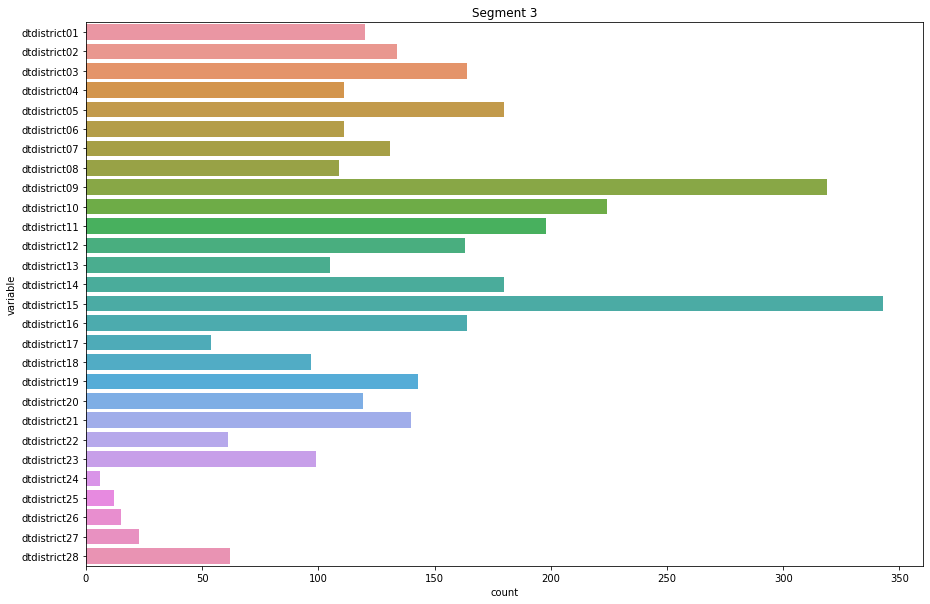

In [114]:
segment3 = segmentation.loc[segmentation['segment']==3]
dis4 = pd.melt(segment3.iloc[:,4:32])
f, axs = plt.subplots(1,1,figsize = (15,10))
sns.countplot(data=dis4.loc[dis4['value']==1], y='variable')
plt.title('Segment 3')

The most searched locations by segment 3 are dtdistrict9 and dtdistrict15.

Text(0.5, 1.0, 'Segment 4')

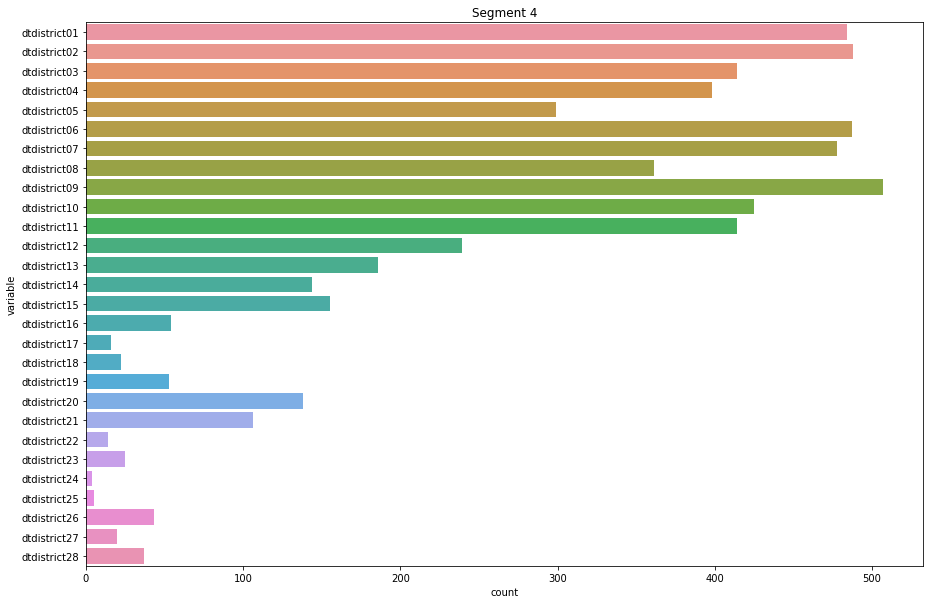

In [115]:
segment4 = segmentation.loc[segmentation['segment']==4]
dis5 = pd.melt(segment4.iloc[:,4:32])
f, axs = plt.subplots(1,1,figsize = (15,10))
sns.countplot(data=dis5.loc[dis5['value']==1], y='variable')
plt.title('Segment 4')

Segment 4 tends to look for a place to stay in between district1 to dtdistrict11.

### Conclusion

Based on the results of clustering, there are 5 user segments based on their search behavior. The five segments have the following characteristics.
1. Segment 0 is a user who is interested in finding a place to rent for a cheap price. This segment is also interested in all types of properties and their favorite locations are dtdistrict 9 and dtdistrict 10, but it is also possible to look for other locations.
2. Segment 1 tends to only be interested in buying a place to stay and they have no price limit when looking for it. They tend to look for property types in the form of condos and landed. Their favorite locations are dtdistrict9, dtdistrict10, dtdistrict11 and dtdistrict15.
3. Segment 2 is a user who is interested in finding a place to rent for a cheap price. This segment is also interested in all types of properties, but tend to be only interested in finding locations in dtdistrict15.
4. Segment 2 is a user who is interested in finding a place to rent for a cheap price. This segment is only interested in condo type properties and their favorite location is dtdistrict 9 and dtdistrict15.
5. Segment 2 is a user who is interested in finding a place to rent for a cheap price. This segment is also interested in all types of properties, but tend to be only interested in finding locations in between district1 to dtdistrict11.